# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('../data/data.csv') # read in the csv witth byte_array - label pairs

In [3]:
print("Number of packets: {}".format(len(df)))
df.head()

Number of packets: 283110


,label,byte1,byte2,byte3,byte4,byte5,byte6,byte7,byte8,byte9,...,byte1471,byte1472,byte1473,byte1474,byte1475,byte1476,byte1477,byte1478,byte1479,byte1480
0,TeamViewer,136,10,23,50,81,180,33,162,145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TeamViewer,23,50,136,10,145,225,58,15,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TeamViewer,23,50,136,10,145,225,58,15,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TeamViewer,145,58,23,50,191,255,24,32,209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TeamViewer,145,58,23,50,191,255,24,69,209,...,12.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Number of packets per label:

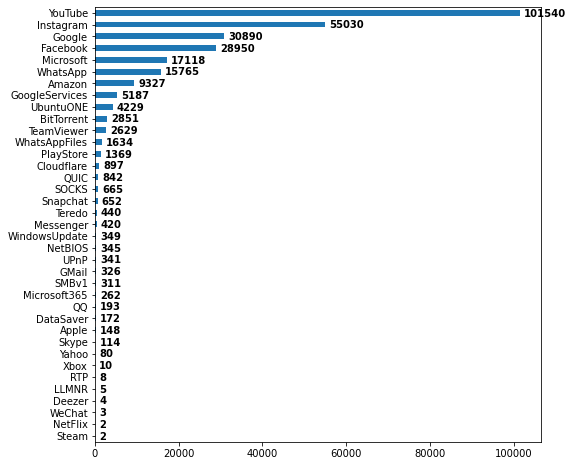

In [4]:
plt.figure(figsize=(8,8))
df_label_counts = df["label"].value_counts().sort_values(ascending=True)
ax = df_label_counts.plot.barh()
for i, v in enumerate(df_label_counts):
    ax.text(v+1000, i-0.3, str(v), fontweight='bold')

#### Histogram of packet lengths:

<AxesSubplot:ylabel='Frequency'>

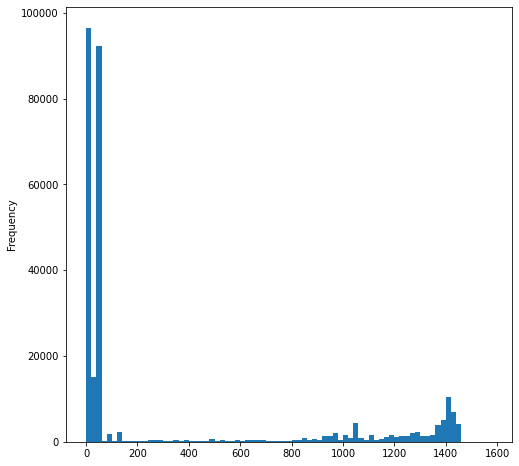

In [5]:
packet_lengths =  df.isna().sum(axis=1)
plt.figure(figsize=(8,8))
packet_lengths.plot.hist(bins = list(range(0, 1600, 20)))

#### Median packet lengths by class

Text(0.5, 0, 'Median Packet Length')

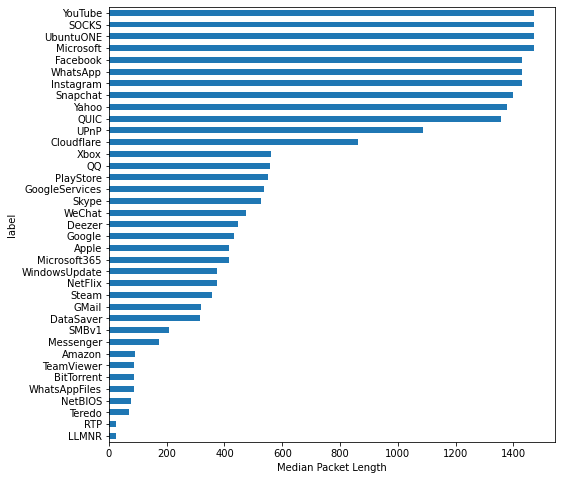

In [12]:
df["packet_length"] = 1480-df.isna().sum(axis=1)
df.groupby('label')["packet_length"].median().sort_values().plot.barh(figsize=(8,8))
plt.xlabel("Median Packet Length")

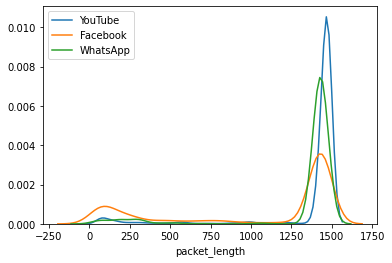

In [15]:
sns.distplot(df[df["label"] == "YouTube"]["packet_length"], hist=False, label="YouTube")
sns.distplot(df[df["label"] == "Facebook"]["packet_length"], hist=False, label="Facebook")
sns.distplot(df[df["label"] == "WhatsApp"]["packet_length"], hist=False, label="WhatsApp")
plt.legend()

## Create Train, Val and Test datasets

In [25]:
classes = ["YouTube", "Facebook", "WhatsApp"]
num_packets = 10000

df_new = pd.DataFrame()

for label in classes:
    df_label = df[df["label"] == label] # e.g. if label == Facebook, extract the Facebook rows
    assert len(df_label) >= num_packets # e.g. make sure at least 10000 Facebook packets
    df_sampled = df_label.sample(n=num_packets, random_state=42)
    df_new = df_new.append(df_sampled)
    
df_new["label"].value_counts()

YouTube     10000
Facebook    10000
WhatsApp    10000
Name: label, dtype: int64

In [26]:
df_new.head()

,label,byte1,byte2,byte3,byte4,byte5,byte6,byte7,byte8,byte9,...,byte1472,byte1473,byte1474,byte1475,byte1476,byte1477,byte1478,byte1479,byte1480,packet_length
228620,YouTube,1,187,240,76,46,26,221,62,195,...,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1472
135723,YouTube,1,187,213,61,45,90,226,63,110,...,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1472
207637,YouTube,1,187,239,129,18,212,172,76,226,...,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1472
198804,YouTube,1,187,218,214,118,39,46,80,220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1428
213885,YouTube,1,187,239,151,135,112,7,169,13,...,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1472


Fill NaN's with 0 i.e. zero pad

In [27]:
df_new.fillna(0, inplace=True)

In [28]:
df_new.head()

,label,byte1,byte2,byte3,byte4,byte5,byte6,byte7,byte8,byte9,...,byte1472,byte1473,byte1474,byte1475,byte1476,byte1477,byte1478,byte1479,byte1480,packet_length
228620,YouTube,1,187,240,76,46,26,221,62,195,...,222.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1472
135723,YouTube,1,187,213,61,45,90,226,63,110,...,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1472
207637,YouTube,1,187,239,129,18,212,172,76,226,...,214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1472
198804,YouTube,1,187,218,214,118,39,46,80,220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1428
213885,YouTube,1,187,239,151,135,112,7,169,13,...,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1472


Perform the train-test split

In [29]:
df_train, df_test = train_test_split(df_new, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=42)
len(df_train), len(df_val), len(df_test)

(19200, 4800, 6000)

In [30]:
file_suffix = "{0}_{1}".format(len(classes),num_packets) # e.g. 3_10000

Writing to train.csv and test.csv

In [31]:
df_train.to_csv("../../data/{0}/train_{0}.csv".format(file_suffix), index=False)

In [32]:
df_val.to_csv( "../../data/{0}/val_{0}.csv".format(file_suffix), index=False)

In [33]:
df_test.to_csv("../../data/{0}/test_{0}.csv".format(file_suffix), index=False)